In [1]:
'''Let's try calculating the Lyapunov timescale using Rebound!'''
import matplotlib.pyplot as plt
import rebound
import numpy as np
from numpy import radians as rd

In [2]:
import platform
print("Python version:", platform.python_version())
print("\nNumpy version:", np.version.version)
print("\nRebound version:", rebound.__version__)

Python version: 3.6.10

Numpy version: 1.18.1

Rebound version: 3.12.1


In [3]:

# Note: Atalante is added after Mars. This is because by default WHFast uses Jacobi coordinates.

bodies = ['Sun', 'Mercury', 'Venus', 'Earth', 'Mars', "Atalante",   # Use these bodies
          'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto']
date = '2013-08-09 12:00'            # Start on this date

# Set up simulation.
sim = rebound.Simulation()
sim.add(bodies, date=date)          # Add the Sun and all the planets
sim.move_to_com()                   # Move to the center of momentum frame
sim.save("totally_different_computer.bin")

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Venus Barycenter (299).
Searching NASA Horizons for 'Earth'... Found: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mars'... Found: Mars Barycenter (4).
Searching NASA Horizons for 'Atalante'... Found: 36 Atalante (A855 TA).
Searching NASA Horizons for 'Jupiter'... 

/home/malexand/.anaconda3/envs/astroconda36/lib/python3.6/site-packages/rebound/horizons.py:140: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).
Searching NASA Horizons for 'Pluto'... Found: Pluto Barycenter (9).


In [4]:

twopi = rd(360)                      # 6.283185307179586
dt_out = 20 * twopi                  # Years * 2 Pi, output interval
tmax = 1e5 * twopi                   # Years * 2 Pi, end time
times = np.arange(0., tmax, dt_out)  # Output times, in units yrs * 2 Pi
timeyr = times / twopi               # The times in human-friendly years
megno = np.zeros(len(times))         # An empty array to store megno values
lyapunov_CN = megno.copy()           # An empty array to store LCN values

# Load in cached simulation
sim = rebound.Simulation("totally_different_computer.bin")

sim.integrator = 'whfast'           # Use WHfast
orbits = sim.calculate_orbits()     # Calculate the orbits
sim.dt = 0.05 * orbits[0].P         # Use a timestep = 5% of Mercury's period

# Create a set of variational/shadow particles
var = sim.add_variation()

# Perturb the orbit of the asteroid (particle number 5).
# Ideally, perturb each position and velocity coordinates
# by a random amount (here only x is perturbed).
# Note that the initial perturbation has magnitude 1. 
var.particles[5].x = 1. 

# Now integrate, output, repeat.
for i, time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)   # Integrate
    # Calculate divergence of shadow particle
    d = np.sqrt(np.sum(np.square(var.particles[5].xyz + var.particles[5].vxyz) ))
    lyapunov_CN[i] = 1./time * np.abs(d)/1. # divide by initial perturbation (here 1.)


/home/malexand/.anaconda3/envs/astroconda36/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in double_scalars


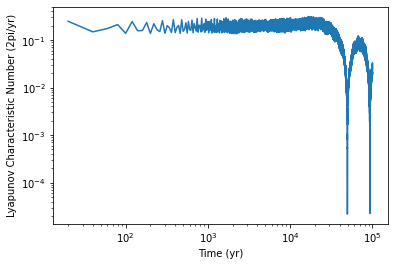

In [5]:
# Make some plots
# First, the LCN vs time.
plt.plot(timeyr, lyapunov_CN)
plt.xlabel('Time (yr)')
plt.ylabel('Lyapunov Characteristic Number (2pi/yr)')
plt.xscale('log')
plt.yscale('log')

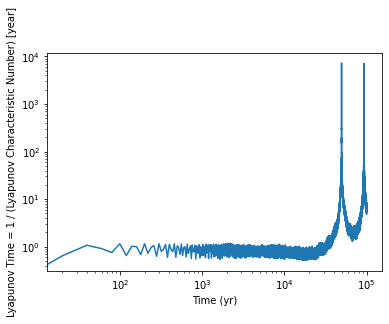

In [6]:
# Make some plots
plt.plot(timeyr, 1 / np.array(lyapunov_CN)/twopi)
plt.xlabel('Time (yr)')
plt.ylabel('Lyapunov Time = 1 / (Lyapunov Characteristic Number) [year]')
plt.yscale('log')
plt.xscale('log')
plt.show()
